# **Survival Analysis of Heart Disease pridiction**

**Will a patient have a 10 year risk of developing a cardio vascular diseases?**

Heart failure, sometimes also referred to as congestive heart failure, is a condition where the heart becomes inefficient at pumping blood to the rest of the body, leading to shortness of breath, body weakness, swelling of legs and ankles and weight gain. Often what precipitates heart failure are risk factors such as coronary artery disease, hypertension, diabetes and obesity. Mortality risk is greater than 50% for those with advanced heart failure within the first 12 months after diagnosis.

# **Data Cleaning and PreProcessing**

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib
import statistics

#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

#Pre processing / Feature Engineering
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel

#Machine Learning
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import model_selection
from sklearn.utils import class_weight
from xgboost import XGBClassifier

#Evaluating algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

#Dealing with imbalanced dataset
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving framingham.csv to framingham.csv


In [ ]:
#read the csv file 
df = pd.read_csv('framingham.csv')

In [ ]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


**About the data**

The dataset is from a cardiovascular study on residents of the town of Framingham, Massachusetts. It includes over 4,240 records and 16 attributes.

The information provided by the dataset are:

**Demographic:**

1. gender : male(0) or female(1)
2. age : Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
3. Education level

**Behavioral:**

4. CurrentSmoker: whether or not the patient is a current smoker (Nominal)
5. CigsPerDay : the number of cigarettes that the person smoked on average in   one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette)

**Information on medical history:**

6. BPMeds : whether or not the patient was on blood pressure medication (Nominal)
7. prevalentStroke : whether or not the patient had previously had a stroke (Nominal)
8. PrevalentHyp: whether or not the patient was hypertensive (Nominal)
9. Diabetes: whether or not the patient had diabetes (Nominal)

**Information on current medical condition:**

10. TotChol: total cholesterol level (Continuous)
11. SysBP: systolic blood pressure (Continuous)
12. DiaBP: diastolic blood pressure (Continuous)
13. BMI: Body Mass Index (Continuous)
14. heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
15. Glucose: glucose level (Continuous)

**Target variable to predict:**

16. 10 year risk of coronary heart disease (CHD) - (binary: “1”, means “Yes”, “0” means “No”)

In [ ]:
#rename the 'male' column as 'gender'
df.rename(columns={'male':'gender'}, inplace=True) 

In [ ]:
df.dtypes

gender               int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [ ]:
#number of rows and columns present in daataset
df.shape

(4240, 16)

In [ ]:
df.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
#check for duplicates
df_duplicate = df[df.duplicated()]

In [ ]:
#645 null values present in whole dataset
df.isnull().sum().sum() 

645

In [ ]:
#null values present in each column
df.isnull().sum()

gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
# Dropping all rows with missing data
df = df.dropna()
df.isna().sum()
df.columns

Index(['gender', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
#null values present in each column
df.isnull().sum()

gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
df.shape

(3658, 16)

# **Data Visualization and Analysis**

In [ ]:
# Creating age groups
df['age'].unique()

array([39, 46, 48, 61, 43, 63, 45, 52, 50, 41, 38, 42, 44, 47, 35, 60, 36,
       59, 54, 37, 53, 49, 65, 51, 62, 40, 56, 67, 57, 66, 64, 55, 58, 68,
       34, 33, 32, 70, 69])

Ages range from 32 to 70 so the following age groups will be created:

* 30-39 years
* 40-49 years
* 50-59 years
* 60-70 years




In [ ]:
df['ageGroup'] = pd.cut(x=df['age'], bins=[30, 39, 49, 59, 70], labels=['30-39 years', '40-49 years', '50-59 years', '60-70 years'])
df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,ageGroup
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,30-39 years
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,40-49 years
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,40-49 years
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,60-70 years
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,40-49 years


Histogram plots of the age distribution of show that the proportion of males in the dataset greater at all ages indicating the higher prevalence of heart failure in men. 

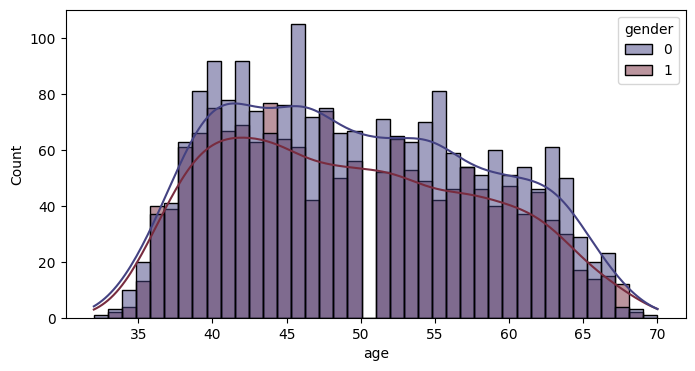

In [ ]:
sns.set_palette("dark")
plt.subplots(figsize=(8,4))
plt.subplot(1,1,1)
sns.histplot(x='age', hue='gender', data=df, kde=True, bins=40, palette="icefire" )
# plt.subplot(1,2,2)
# sns.histplot(x='age', hue='gender', data=df,stat="density", common_norm=False, kde=True, bins=40)
# colors = sns.color_palette('bright')[0:5]
plt.show()

Histogram plots of the age distribution of the data also show that a greater proportion of heart failure survivors are under 55 years of age (left plot) whereas those over 70 (normalized, right plot) are at a greater risk of death. This data is in line with the epidemiological facts of heart failure that being over 55 yrs is a major risk factor for mortality

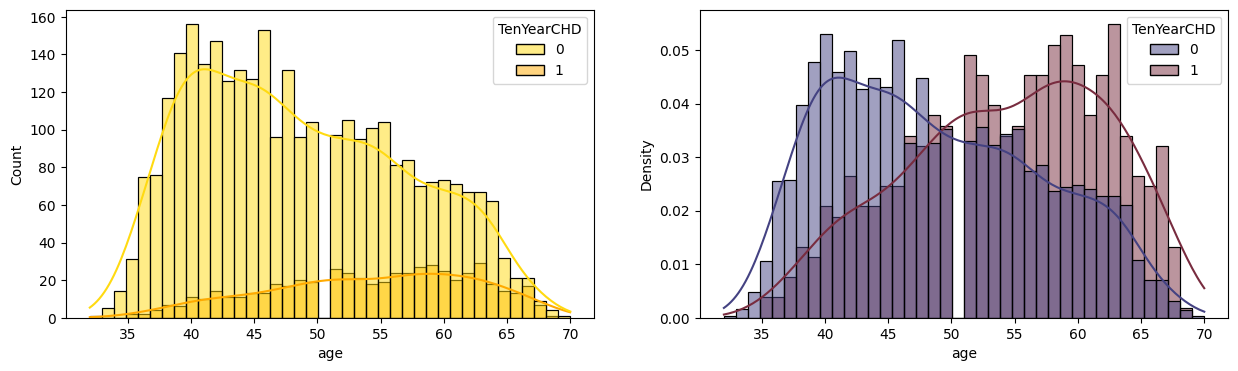

In [ ]:
sns.set_palette("dark")
plt.subplots(figsize=(15,4))
plt.subplot(1,2,1)
sns.histplot(x='age', hue='TenYearCHD', data=df, kde=True, bins=40, palette="Wistia")
plt.subplot(1,2,2)
sns.histplot(x='age', hue='TenYearCHD', data=df, stat="density", common_norm=False, kde=True, bins=40, palette="icefire")
plt.show()

**Grouping features by type of variable (categorical and continuous):**


In [ ]:
categorical_features = ['gender', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 
                        'prevalentHyp', 'diabetes', 'ageGroup']

In [ ]:
for feature in categorical_features:
    print(feature,':')
    print(df[feature].value_counts())
    print("-----------------")

gender :
0    2035
1    1623
Name: gender, dtype: int64
-----------------
education :
1.0    1526
2.0    1101
3.0     608
4.0     423
Name: education, dtype: int64
-----------------
currentSmoker :
0    1869
1    1789
Name: currentSmoker, dtype: int64
-----------------
BPMeds :
0.0    3547
1.0     111
Name: BPMeds, dtype: int64
-----------------
prevalentStroke :
0    3637
1      21
Name: prevalentStroke, dtype: int64
-----------------
prevalentHyp :
0    2518
1    1140
Name: prevalentHyp, dtype: int64
-----------------
diabetes :
0    3559
1      99
Name: diabetes, dtype: int64
-----------------
ageGroup :
40-49 years    1438
50-59 years    1143
60-70 years     596
30-39 years     481
Name: ageGroup, dtype: int64
-----------------


In [ ]:
#Now for the continuous variables
numeric_features = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

<ipython-input-22-a379438f09fd>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-22-a379438f09fd>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-22-a379438f09fd>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

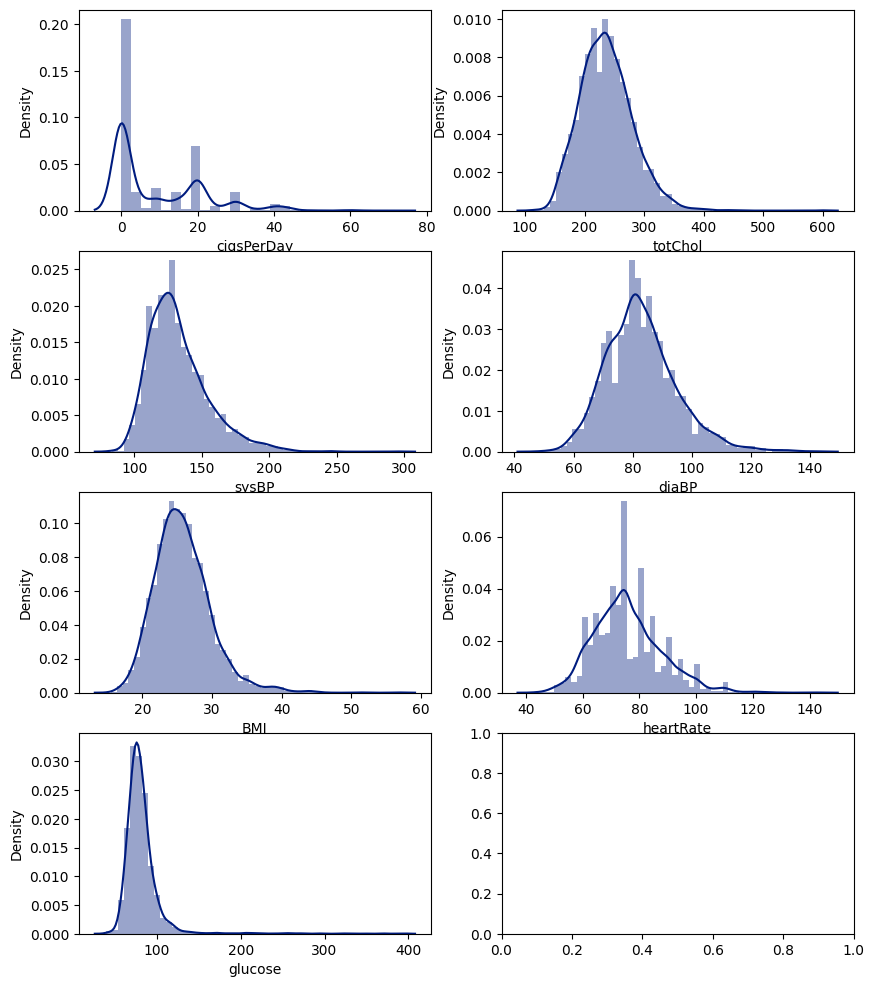

In [ ]:
f, axes = plt.subplots(4, 2, figsize=(10,12))
index1 = 0
index2 = 0

for col in numeric_features:
    sns.distplot(df[col], ax=axes[index1][index2]);
    index2 = index2+1
    if index2==2:
        index2 = 0
        index1 = index1+1
plt.show();

*  cigsperday demonstrated to be a highly unevenly distributed variable
*  heartRate is also unevenly distributed
*  glucose, BMI, diaBP, sysBP and totChol variables demonstrated to be more evenly distributed, similar to a normal distribution.





<Axes: xlabel='TenYearCHD', ylabel='age'>

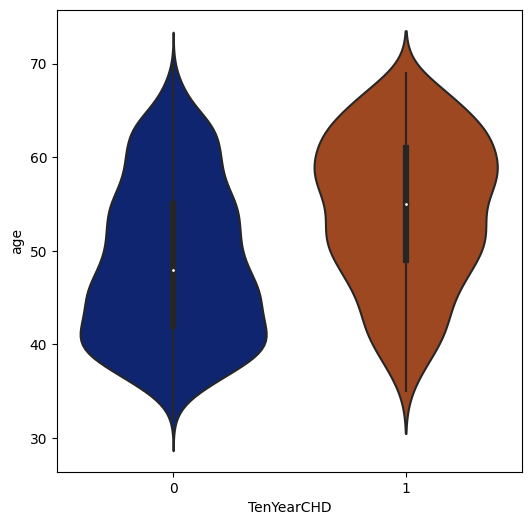

In [ ]:
# age vs CHD
plt.figure(figsize=(6,6))
sns.violinplot(x='TenYearCHD', y='age', data=df)

Violinplot tells that most patients of age around 40-55 have 0 risk

Most patients of age around 60-65 have risk of disease (CHD)

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

44.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



<Axes: xlabel='TenYearCHD', ylabel='age'>

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning:

68.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.



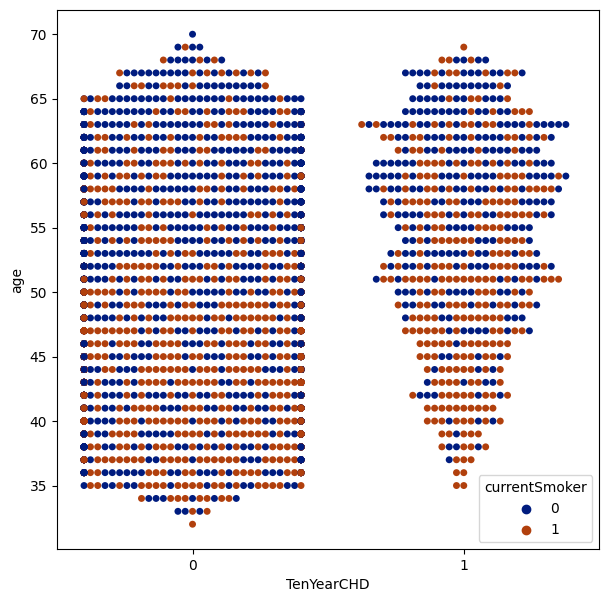

In [ ]:
# age vs CHD for smokers or non-smoker
plt.figure(figsize=(7,7))
sns.swarmplot(x='TenYearCHD', y='age', data=df, hue='currentSmoker')

<Axes: xlabel='TenYearCHD', ylabel='age'>

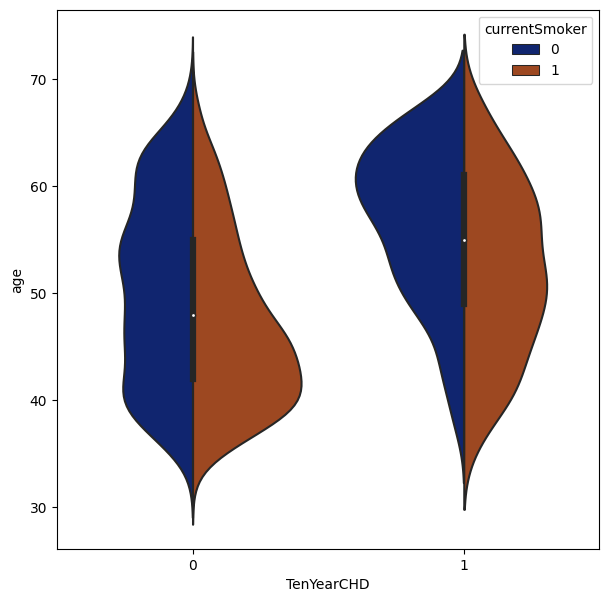

In [ ]:
plt.figure(figsize=(7,7))
sns.violinplot(x='TenYearCHD', y='age', data=df, hue='currentSmoker', split=True)

From this violinplot, we see that most of smokers having no risk of CHD are in age around 40 years
But most of non-smokers having risk are in age around 65-70 years Also most smokers having risk are in age around 50 years

**Which gender is more prone to heart disease?**

In [ ]:
data_cat= df.copy()
data_cat['gender'] = data_cat['gender'].map({0: 'female',1: 'male'})
data_cat['TenYearCHD'] = data_cat['TenYearCHD'].map({0:'negative', 1:'positive'})   
data_cat['diabetes']= data_cat['diabetes'].map({0:'negative', 1:'positive'}) 
data_cat['education']=data_cat['education'].map({1:'Some High School', 2:'High School or GED', 3:'Some College or Vocational School', 4:'College'})
data_cat.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,ageGroup
0,male,39,College,0,0.0,0.0,0,0,negative,195.0,106.0,70.0,26.97,80.0,77.0,negative,30-39 years
1,female,46,High School or GED,0,0.0,0.0,0,0,negative,250.0,121.0,81.0,28.73,95.0,76.0,negative,40-49 years
2,male,48,Some High School,1,20.0,0.0,0,0,negative,245.0,127.5,80.0,25.34,75.0,70.0,negative,40-49 years
3,female,61,Some College or Vocational School,1,30.0,0.0,0,1,negative,225.0,150.0,95.0,28.58,65.0,103.0,positive,60-70 years
4,female,46,Some College or Vocational School,1,23.0,0.0,0,0,negative,285.0,130.0,84.0,23.10,85.0,85.0,negative,40-49 years


In [ ]:
data_cat['Count_10YCHD'] = 1
data_cat.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,ageGroup,Count_10YCHD
0,male,39,College,0,0.0,0.0,0,0,negative,195.0,106.0,70.0,26.97,80.0,77.0,negative,30-39 years,1
1,female,46,High School or GED,0,0.0,0.0,0,0,negative,250.0,121.0,81.0,28.73,95.0,76.0,negative,40-49 years,1
2,male,48,Some High School,1,20.0,0.0,0,0,negative,245.0,127.5,80.0,25.34,75.0,70.0,negative,40-49 years,1
3,female,61,Some College or Vocational School,1,30.0,0.0,0,1,negative,225.0,150.0,95.0,28.58,65.0,103.0,positive,60-70 years,1
4,female,46,Some College or Vocational School,1,23.0,0.0,0,0,negative,285.0,130.0,84.0,23.10,85.0,85.0,negative,40-49 years,1


In [ ]:
data_pv = data_cat.pivot_table('Count_10YCHD', ['gender', 'TenYearCHD'], aggfunc="sum").reset_index()
data_pv.head()

,gender,TenYearCHD,Count_10YCHD
0,female,negative,1785
1,female,positive,250
2,male,negative,1316
3,male,positive,307


In [ ]:
fig1 = px.bar(data_pv, x="gender", y = 'Count_10YCHD', color='TenYearCHD', color_discrete_sequence=['grey', 'Crimson'], width = 700, height=500)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig1.update_layout(barmode='stack', title={'text': 'Ten Year CHD Probabilities by Gender', 'x':0.5, 'xanchor': 'center'})
fig1.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), legend=dict(yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99))

fig1.show()

Here from the above, we see that most data are females.
There are more females having no risk than males having no risk and
There are slightly more males having risk than females having risk

**Is educational level relevant?**

In [ ]:
data_pv_ed = data_cat.pivot_table('Count_10YCHD', ['education', 'TenYearCHD'], aggfunc="sum").reset_index()
data_pv_ed.head()

,education,TenYearCHD,Count_10YCHD
0,College,negative,363
1,College,positive,60
2,High School or GED,negative,970
3,High School or GED,positive,131
4,Some College or Vocational School,negative,533


In [ ]:
fig2 = px.bar(data_pv_ed, x="education", y = 'Count_10YCHD', color='TenYearCHD', color_discrete_sequence=['grey', 'Crimson'], width=700, height=500)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig2.update_layout(barmode='stack', title={'text': 'Ten Year CHD Probabilities by Education Level', 'x':0.5, 'xanchor': 'center'})
fig2.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), legend=dict(yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01))
fig2.show()

It seems that the incidence of heart disease is more pronounced in the group with lower educational level, but we must investigate the causes for that. This dataset comprises patients from the USA, a country where not everyone has access to healthcare. The population with lower education level is more prone to not having access to healthcare, because of their job situation.so, In the above we see that population with lower level education has more risk

**Which age and gender group smoke more?**

In [ ]:
data_gp_cs = data_cat.pivot_table('currentSmoker', ['gender', 'ageGroup'], aggfunc="sum").reset_index()
data_gp_cs.head(10)

,gender,ageGroup,currentSmoker
0,female,30-39 years,140
1,female,40-49 years,402
2,female,50-59 years,200
3,female,60-70 years,66
4,male,30-39 years,139
5,male,40-49 years,439
6,male,50-59 years,284
7,male,60-70 years,119


In [ ]:
fig3 = px.bar(data_gp_cs, x= 'ageGroup', y="currentSmoker", color='gender', color_discrete_sequence=['firebrick', 'dimgray' ], width=900, height=600)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig3.update_layout(barmode='stack', title={'text': 'Number of Current Smokers by Gender and Age Group', 
                                           'x':0.5, 
                                           'xanchor': 'center'})
fig3.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), legend=dict(yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01))

fig3.show()

In all age groups, men smoke more than women. We have a total of 4240 patients in the dataset, of which 1788 are smokers, this is 42% of the dataset.

**Checking the relation between some health conditions (diabetes, hypertension, stroke) in the incidence of heart disease.**

In [ ]:
data_conditions = data_cat.pivot_table('Count_10YCHD', ['diabetes', 'prevalentStroke', 'prevalentHyp', 'TenYearCHD'], aggfunc="sum").reset_index()
data_conditions['diabetes'] = data_conditions['diabetes'].replace(['positive','negative'], ['Diabetic','Non-Diabetic'])
data_conditions['prevalentHyp']=data_conditions['prevalentHyp'].replace([0,1],['Not Hypertensive', 'Hypertensive'])
data_conditions['prevalentStroke']=data_conditions['prevalentStroke'].replace([0,1],['Never had a stroke', 'Has had a stroke'])
data_conditions.head(14)

,diabetes,prevalentStroke,prevalentHyp,TenYearCHD,Count_10YCHD
0,Non-Diabetic,Never had a stroke,Not Hypertensive,negative,2206
1,Non-Diabetic,Never had a stroke,Not Hypertensive,positive,260
2,Non-Diabetic,Never had a stroke,Hypertensive,negative,818
3,Non-Diabetic,Never had a stroke,Hypertensive,positive,255
4,Non-Diabetic,Has had a stroke,Not Hypertensive,negative,5
5,Non-Diabetic,Has had a stroke,Not Hypertensive,positive,1
6,Non-Diabetic,Has had a stroke,Hypertensive,negative,8
7,Non-Diabetic,Has had a stroke,Hypertensive,positive,6
8,Diabetic,Never had a stroke,Not Hypertensive,negative,34
9,Diabetic,Never had a stroke,Not Hypertensive,positive,12


In [ ]:
data_hyp = data_conditions.groupby(['prevalentHyp', 'TenYearCHD']).sum().reset_index()
data_hyp.head()

,prevalentHyp,TenYearCHD,Count_10YCHD
0,Hypertensive,negative,856
1,Hypertensive,positive,284
2,Not Hypertensive,negative,2245
3,Not Hypertensive,positive,273


In [ ]:
fig4 = px.bar(data_hyp, x= 'TenYearCHD', y="Count_10YCHD", color='prevalentHyp', color_discrete_sequence=['yellow', 'midnightblue' ], width=800, height=500)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig4.update_layout(barmode='stack', title={'text': 'Prevalent Hypertension and Probability of CHD', 'x':0.5, 'xanchor': 'center'})
fig4.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), legend=dict(yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99))
fig4.show()

In [ ]:
data_dia = data_conditions.groupby(['diabetes', 'TenYearCHD']).sum().reset_index()
data_dia.head()

,diabetes,TenYearCHD,Count_10YCHD
0,Diabetic,negative,64
1,Diabetic,positive,35
2,Non-Diabetic,negative,3037
3,Non-Diabetic,positive,522


In [ ]:
fig5 = px.bar(data_dia, x= 'TenYearCHD', y="Count_10YCHD", color='diabetes', color_discrete_sequence=['yellow', 'midnightblue' ], width=800, height=500)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig5.update_layout(barmode='stack', title={'text': 'Diabetes and Probability of CHD', 'x':0.5, 'xanchor': 'center'})
fig5.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), legend=dict(yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99))
fig5.show()

In [ ]:
data_str = data_conditions.groupby(['prevalentStroke', 'TenYearCHD']).sum().reset_index()
data_str.head()

,prevalentStroke,TenYearCHD,Count_10YCHD
0,Has had a stroke,negative,13
1,Has had a stroke,positive,8
2,Never had a stroke,negative,3088
3,Never had a stroke,positive,549


In [ ]:
fig6 = px.bar(data_str, x= 'TenYearCHD', y="Count_10YCHD", color='prevalentStroke', color_discrete_sequence=['yellow', 'midnightblue' ], width=800, height=500)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig6.update_layout(barmode='stack', title={'text': 'Prevalent Stroke and Probability of CHD', 'x':0.5, 'xanchor': 'center'})
fig6.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), legend=dict(yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99))
fig6.show()

**BMI, Cholesterol, Glucose and heart rate levels by age group**

In [ ]:
fig7 = px.box(data_cat, x="ageGroup", y="totChol", color_discrete_sequence=['olivedrab'], width=900, height=600)
fig7.update_layout(
    title={
        'text': "Total Cholesterol by age group",
        'x':0.5,
        'xanchor': 'center'})

fig7.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Rockwell"
    )
)
fig7.show()

From the boxplots we can see that:

Age group 30-39 years seem to have lower levels of total cholesterol, with median of 210.
A patient in age group 50-59 has a very high totChol level, of 600
The median for age group 60-70 years was the highest of all: 247.5, the second age group on this list was 50-59 years, following the trend that total cholesterol levels tend to be higher in an older population.

In [ ]:
fig8 = px.box(data_cat, x="ageGroup", y="BMI",color_discrete_sequence=['Coral'], width=900, height=600)
fig8.update_layout(
    title={
        'text': "BMI by age group",
        'x':0.5,
        'xanchor': 'center'})
fig8.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=12,
        font_family="Rockwell"
    )
)
fig8.show()

In [ ]:
fig9 = px.box(data_cat, x="ageGroup", y="glucose", color_discrete_sequence=['teal'], width=900, height=600)
fig9.update_layout(
    title={
        'text': "Glucose by age group",
        'x':0.5,
        'xanchor': 'center'})
fig9.show()

In [ ]:
fig10 = px.box(data_cat, x="ageGroup", y="heartRate", color_discrete_sequence=['saddlebrown'], width=900, height=600)
fig10.update_layout(
    title={
        'text': "Heart rate by age group",
        'x':0.5,
        'xanchor': 'center'})
fig10.show()

In [ ]:
trace0 = go.Box(x=data_cat['ageGroup'],y=data_cat['sysBP'], name='Systolic Blood Pressure', line=dict(color='olivedrab'))
trace1 = go.Box(x=data_cat['ageGroup'], y=data_cat['diaBP'], name='Diastolic Blood Pressure', line=dict(color='goldenrod'))

fig11 = go.Figure([trace0, trace1])
fig11.update_layout(
    title={
        'text': "Blood Pressure by Age Group",
        'x':0.5,
        'xanchor': 'center'}, 
        height=600,   # adjust the height
        width=1000)
fig11.show()

**Considering the continuous variables, can we set limits in each that indicate that the patient is more prone to develop heart disease?**

In [ ]:
data_matrix = df.drop(['gender', 'education', 'ageGroup', 'prevalentStroke', 'prevalentHyp', 
                         'diabetes', 'BPMeds', 'currentSmoker'], axis=1)

In [ ]:
data_matrix.head()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
textd = ['Not at risk of CHD' if cl==0 else 'Risk of CHD' for cl in data_matrix['TenYearCHD']]

fig12 = go.Figure(data=go.Splom(
                  dimensions=[dict(label='Age', values=data_matrix['age']),
                              dict(label='Cigs per day', values=data_matrix['cigsPerDay']),
                              dict(label='Total Cholesterol', values=data_matrix['totChol']),
                              dict(label='Systolic BP', values=data_matrix['sysBP']),
                              dict(label='Diastolic BP', values=data_matrix['diaBP']),
                              dict(label='BMI', values=data_matrix['BMI']),
                              dict(label='Heart Rate', values=data_matrix['heartRate']),
                              dict(label='Glucose', values=data_matrix['glucose'])],
                  marker=dict(color=data_matrix['TenYearCHD'],
                              size=5,
                              colorscale='Bluered',
                              line=dict(width=0.5,
                                        color='rgb(230,230,230)')),
                  text=textd,
                  diagonal=dict(visible=False)))

title = "Scatterplot Matrix (SPLOM) for Framingham Heart Study Dataset"
fig12.update_layout(title=title,
                  dragmode='select',
                  width=1000,
                  height=1000,
                  hovermode='closest')

fig12.show()

From the matrix plot above, we can see that for all continuous variables considered there is no clear limit. We cannot say for sure that for a certain level of a variable we can separate the patients at risk of developing heart disease and those not at risk as we observe the scatterplots.

***Statistics on the variables***

In [ ]:
df.describe()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.443685,49.551941,1.980317,0.489065,9.025424,0.030344,0.005741,0.311646,0.027064,236.847731,132.370558,82.917031,25.782802,75.730727,81.852925,0.152269
std,0.496886,8.562029,1.022656,0.499949,11.921590,0.171557,0.075561,0.463229,0.162292,44.097681,22.086866,11.974258,4.065601,11.981525,23.904164,0.359331
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,143.875000,90.000000,28.037500,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


<ipython-input-50-9e11832163f0>:3: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



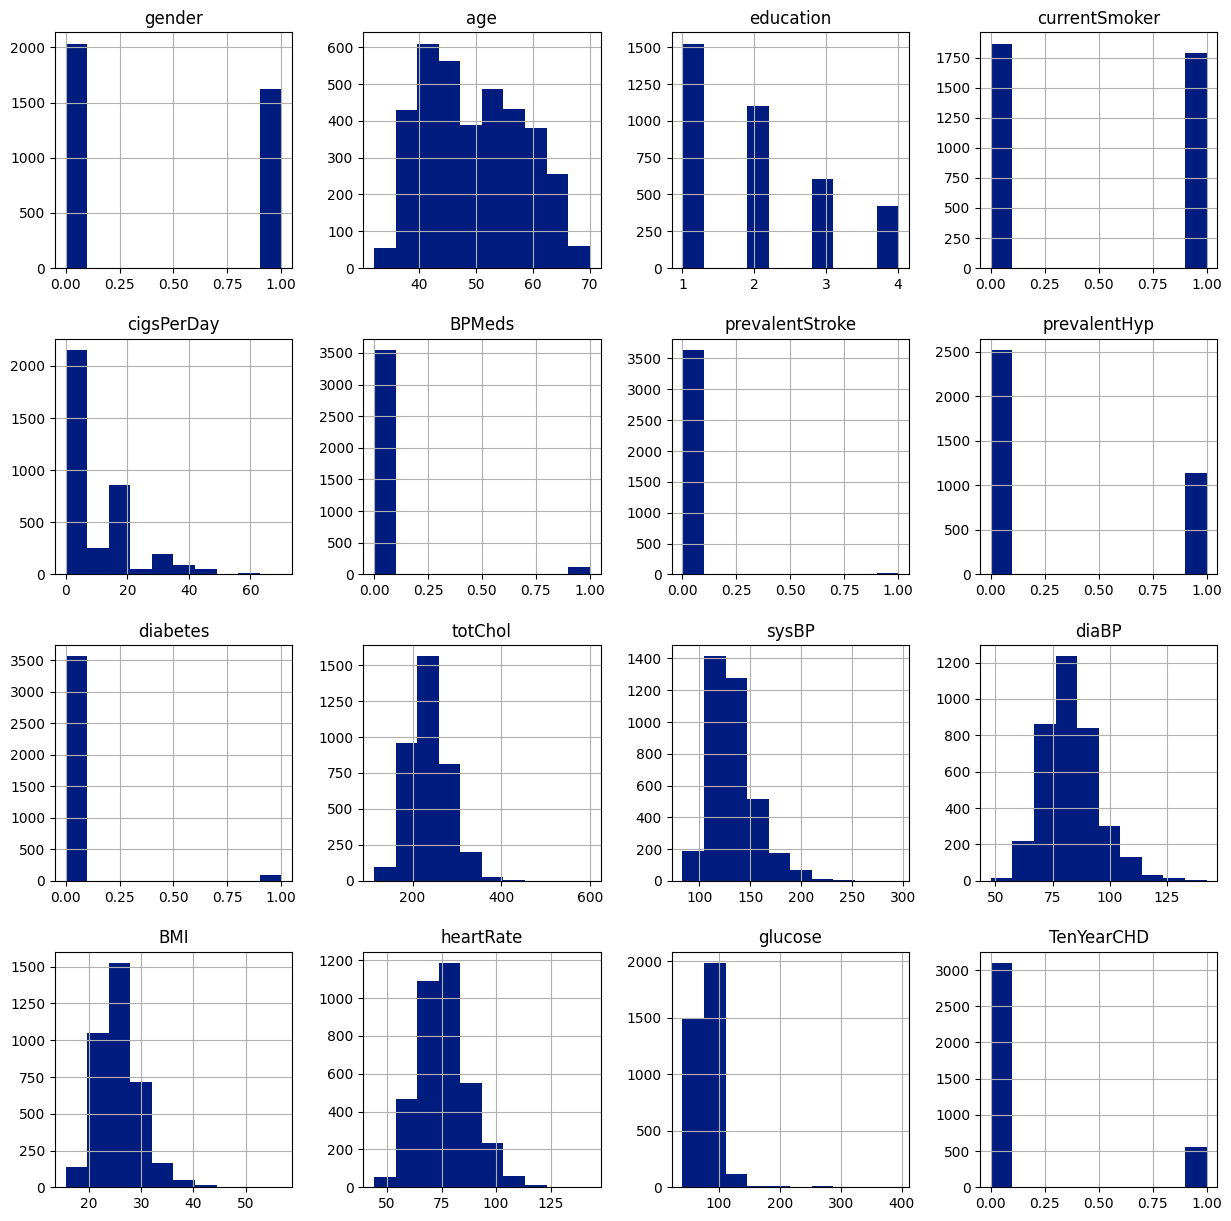

In [ ]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
df.hist(ax = ax);

From the statistics above we have:

* The mean age of the participants of the study is 49 years, being 32 years the youngest participant and 70 years the oldest one.
* The partipant who smokes more, smokes an incredible amount of 70 cigarettes per day.
* Mean BMI is 25. Recalling that BMI stands for Body Mass Index. Levels above 25 and below 30 are considered overweight. Above 30, the patient is considered obese.
* The mean glucose level is 81, which falls within a normal glucose level

**Checking the target variable**

In [ ]:
df.TenYearCHD.value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

15% of the data indicate positive for heart disease in the near future.

**Correlation matrix**

In [ ]:
correlations = df.corr()
correlations

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
gender,1.000000,-0.024412,0.017729,0.206114,0.330322,-0.052124,-0.002312,0.001424,0.013819,-0.070321,-0.045358,0.051872,0.073111,-0.115285,0.002940,0.091688
age,-0.024412,1.000000,-0.159499,-0.210771,-0.189295,0.134732,0.050893,0.306239,0.109092,0.268252,0.388267,0.208283,0.137511,-0.002722,0.118349,0.233983
education,0.017729,-0.159499,1.000000,0.025251,0.013790,-0.013739,-0.030386,-0.078828,-0.039627,-0.013522,-0.124360,-0.058059,-0.137555,-0.064214,-0.031998,-0.063279
currentSmoker,0.206114,-0.210771,0.025251,1.000000,0.773913,-0.051923,-0.038150,-0.108078,-0.041849,-0.051034,-0.134428,-0.115955,-0.159821,0.050841,-0.053242,0.019165
cigsPerDay,0.330322,-0.189295,0.013790,0.773913,1.000000,-0.046504,-0.036286,-0.070460,-0.036961,-0.030400,-0.094781,-0.056746,-0.087395,0.064030,-0.053726,0.052014
BPMeds,-0.052124,0.134732,-0.013739,-0.051923,-0.046504,1.000000,0.113125,0.262910,0.049066,0.094083,0.271263,0.199630,0.105642,0.012889,0.054232,0.089152
prevalentStroke,-0.002312,0.050893,-0.030386,-0.038150,-0.036286,0.113125,1.000000,0.066057,0.009625,0.012736,0.061070,0.055834,0.036496,-0.017019,0.016061,0.048366
prevalentHyp,0.001424,0.306239,-0.078828,-0.108078,-0.070460,0.262910,0.066057,1.000000,0.080556,0.166655,0.697675,0.617734,0.302949,0.146818,0.086942,0.181387
diabetes,0.013819,0.109092,-0.039627,-0.041849,-0.036961,0.049066,0.009625,0.080556,1.000000,0.048451,0.102552,0.050686,0.089009,0.060984,0.614820,0.093431
totChol,-0.070321,0.268252,-0.013522,-0.051034,-0.030400,0.094083,0.012736,0.166655,0.048451,1.000000,0.219925,0.174422,0.121056,0.093053,0.049884,0.091338


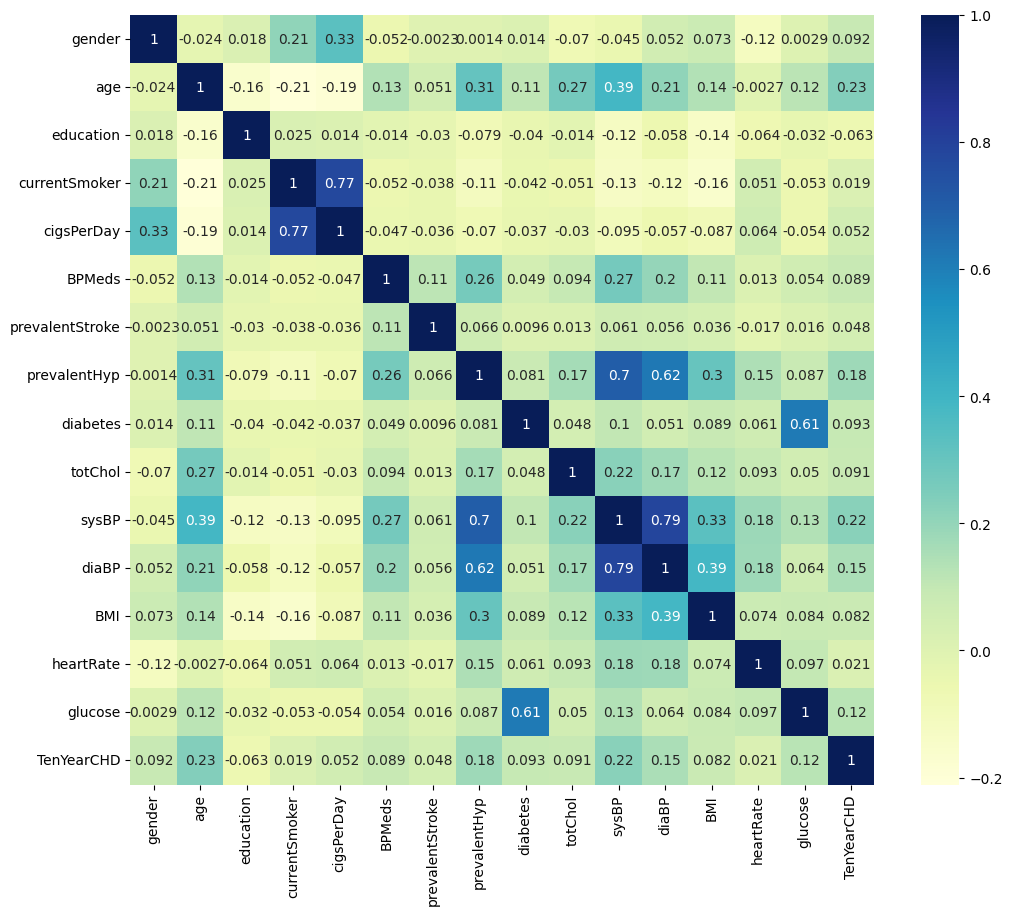

In [ ]:
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(correlations, annot=True, cmap='YlGnBu');

The correlation coefficients of the variables individually did not shown a strong correlation with TenYearCHD. This only confirms what was already expected: the propensity of developing heart disease is a result of a conjunction of factors.

**Feature selection with different methods**

In [ ]:
df.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,ageGroup
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0,30-39 years
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0,40-49 years
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0,40-49 years
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1,60-70 years
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0,40-49 years


As an attempt to improve the results of the feature selection methods below, education will be dropped from the data as this is not related to a behavioural or medical history attribute. Gender will be kept so as to analyse the relationship between gender and heart disease. ageGroup will also be dropped as this variable was created only to visualize data on the previous section.

In [ ]:
df.drop(['education', 'ageGroup'],axis=1,inplace=True)
df.head()

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
#predictors:
X=df.iloc[:,0:14]

#label:
y=df.iloc[:,-1]
print("X - ", X.shape, "\ny - ", y.shape)

#To reduce the number of features from 15 to 10:
num_feats=10

X -  (3658, 14) 
y -  (3658,)


**Filter Method: Chi-square**

A filter method selects subsets of features based on their relationship with the target variable. There are statistical methods and feature importance methods in this classification.

we have a categorical output and numerical and categorical inputs. According to this [post](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/) on Machine Learning Mastery blog, for categorical classification problems a recommended filter method is chi-square method.



In [ ]:
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(score_func=chi2, k=num_feats)
fit = chi_selector.fit(X_norm,y)
chi_support = chi_selector.get_support()
chi_feature = X.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

10 selected features


In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(11,'Score'))  #print 10 best features

              Specs      Score
6      prevalentHyp  82.845455
7          diabetes  31.067621
4            BPMeds  28.191569
1               age  22.005816
0            gender  17.107751
9             sysBP   8.569355
5   prevalentStroke   8.507833
10            diaBP   3.581426
3        cigsPerDay   2.225690
13          glucose   2.098895
8           totChol   0.983655


**Wrapped method: RFE**

RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains.

In this method we will use a Logistic regression model, so it will be necessary to use the normalized input. As stated on the book "Feature Engineering":

Models that are smooth functions of the input, such as linear regression, logistic regression, or anything that involves a matrix, are affected by the scale of the input.

In [ ]:
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=num_feats, step=10, verbose=5)
#rfe_selector = RFE(estimator=LogisticRegression(), step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 14 features.
10 selected features


In [ ]:
rfe_feature

['gender',
 'age',
 'cigsPerDay',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'BMI',
 'glucose']

**Embedded method : Decision Tree**

Embedded methods combine features from filter and wrapper methods. In this case, there is no need to scale the input, as tree-based models are not affected by the scale.

In [ ]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

7 selected features


In [ ]:
embeded_rf_feature

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

Take a look at comparison:

In [ ]:
feature_name = list(X.columns)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name,'Chi-2':chi_support, 'RFE':rfe_support, 'Random Forest':embeded_rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(15)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,Feature,Chi-2,RFE,Random Forest,Total
1,sysBP,True,True,True,3
2,glucose,True,True,True,3
3,age,True,True,True,3
4,totChol,False,True,True,2
5,prevalentStroke,True,True,False,2
6,prevalentHyp,True,True,False,2
7,gender,True,True,False,2
8,diabetes,True,True,False,2
9,diaBP,True,False,True,2
10,cigsPerDay,True,True,False,2


**Features to consider :** 

The only method that considered sysBP and diaBP as relevant was chi-squared method. The blood pressure of a patient is given by these two measures, so it does not make sense to consider one and not the other. Another thing to consider is the variable BPMeds that states whether the patient is on blood pressure medication. I am considering that this variable is also important because if the patient is already on blood pressure medication it means that it is at a higher risk of developing heart diseases.

For the reasons state above, the final features for the model will be the ones chosen by chi-squared method including totChol because this variable gives total cholesterol levels and may be relevant.

1. prevalentHyp
2. diabetes
3.BPMeds (whether the patient was on blood pressure medication - this indicates the patient is hypertensive, which can be considered as a ramification of prevalentHyp, sysBP and diaBP variables)
4. age
5. Gender
6. sysBP (systolic blood pressure)
7. prevalentStroke
8. diaBP (diastolic blood pressure)
9. cigsperday
10. glucose
11. totChol

**Features to exclude :**

1. BMI
2. currentSmoker (redundandt with cigsperday)
3. heartRate (only one method chose this one)

# **Preparing the model for Machine Learning**

In [ ]:
df.head()

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
#Seprating data
#Creating a dataset with only the features selected 
data_features = df.drop(['currentSmoker', 'BMI', 'heartRate'], axis=1)
data_features.head()

,gender,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,glucose,TenYearCHD
0,1,39,0.0,0.0,0,0,0,195.0,106.0,70.0,77.0,0
1,0,46,0.0,0.0,0,0,0,250.0,121.0,81.0,76.0,0
2,1,48,20.0,0.0,0,0,0,245.0,127.5,80.0,70.0,0
3,0,61,30.0,0.0,0,1,0,225.0,150.0,95.0,103.0,1
4,0,46,23.0,0.0,0,0,0,285.0,130.0,84.0,85.0,0


In [ ]:
X = data_features.iloc[:, 0:11].values 
y = data_features.iloc[:, 11].values 

**Scaling the attributes**

Apart from decision tree and random forest classifiers the other classifiers that will be tested require scaled data.

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

# **Machine Learning Models**

**Classification algorithms (Model + Validation + Evaluation)**

refrence post : [Quickly Compare Multiple Models](https://towardsdatascience.com/quickly-test-multiple-models-a98477476f0)

In [ ]:
def run_exps(X_train , y_train, X_test, y_test) :
#def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
  dfs = []
models = [
          ('Logistic Regression', LogisticRegression()), 
          ('Random Forest', RandomForestClassifier()),
          ('KNearest Neighbors', KNeighborsClassifier()),
          ('SVM', SVC()), 
          ('Naive Bayes', GaussianNB()),
          ('XGBoost', XGBClassifier()),
          ('Decision Tree', DecisionTreeClassifier())
        ]
out = []
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['No risk of CHD', 'Risk of CHD']
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names), confusion_matrix(y_test,y_pred))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        out.append(this_df)
        final = pd.concat(out, ignore_index=True)

Logistic Regression
                precision    recall  f1-score   support

No risk of CHD       0.84      0.99      0.91       456
   Risk of CHD       0.64      0.10      0.17        93

      accuracy                           0.84       549
     macro avg       0.74      0.54      0.54       549
  weighted avg       0.81      0.84      0.78       549
 [[451   5]
 [ 84   9]]
Random Forest
                precision    recall  f1-score   support

No risk of CHD       0.84      0.99      0.91       456
   Risk of CHD       0.60      0.10      0.17        93

      accuracy                           0.84       549
     macro avg       0.72      0.54      0.54       549
  weighted avg       0.80      0.84      0.78       549
 [[450   6]
 [ 84   9]]
KNearest Neighbors
                precision    recall  f1-score   support

No risk of CHD       0.85      0.96      0.90       456
   Risk of CHD       0.47      0.15      0.23        93

      accuracy                           0.83       5

In [ ]:
final_gp = final.groupby('model').mean().reset_index()
final_gp.head(7)

,model,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc
0,Decision Tree,0.011779,0.006534,0.761016,0.771245,0.761016,0.765742,0.548385
1,KNearest Neighbors,0.003232,0.084482,0.835316,0.778748,0.835316,0.794271,0.600426
2,Logistic Regression,0.021838,0.015952,0.853002,0.826995,0.853002,0.797343,0.717863
3,Naive Bayes,0.001659,0.006825,0.825344,0.793436,0.825344,0.805148,0.701861
4,Random Forest,0.506396,0.057625,0.849465,0.802717,0.849465,0.801423,0.664817
5,SVM,0.200983,0.079844,0.850753,0.800856,0.850753,0.786340,0.581404
6,XGBoost,0.237428,0.012728,0.834028,0.789438,0.834028,0.801637,0.620576


In [ ]:
# Evaluating precision by model

fig14 = px.bar(final_gp, x= 'test_precision_weighted', y = 'model', color='model', width=800, height=500,  color_discrete_sequence=['teal', 'olivedrab', 'grey', 'darksalmon', 'rosybrown', 'firebrick' , 'darkgoldenrod' ])
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig14.update_layout(barmode='stack', title={'text': 'Precision of Each Model trained', 
                                           'x':0.5, 
                                           'xanchor': 'center'})
fig14.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), xaxis_tickformat = '%', xaxis_range=[0,1], showlegend=False)
fig14.show()

**Evaluating the metrics**

**Accuracy:**

Accuracy is not a good metric in this study because we have unbalanced classes.

**Precision:**

Precision is a better for this type of unbalanced dataset than accuracy. This is a measure of classifier exactness, a low precision can also indicate a large number of false positives. Precision is shown for each class as this is a measure of true positives divided by true positives plus false positives.

All machine learning models tested for this case had a bad precision for the "Risk of CHD" class, most of them below 50%. Logistic regression had the 'best' result (64%) but still it is a low precision considering we are dealing with a model on medical data. As for the "No risk of CHD" class, Naive bayes had the best precision of 86% ,followed by XGBoost and KNN (85%) and Logistic regression and Random Forest (84%). Also this is not good considering we are dealing with health data.

**Recall:**

This is the fraction of samples from a class which are correctly predicted by the model, also called Sensitivity or True Positive Rate.

All ML models tested had good recall rates, above 90% for the "No risk of CHD" class. On the other hand, for the 'Risk of CHD' class the results were not good. The recall rates are too low, which indicates we have several false negatives.

**F1-Score:**

This is a tradeoff between precision and recall - it is the harmonic mean of precision and recall. This is a good metric for unbalanced data. The higher the F1-Score, the better. Again, for the "No risk of CHD" class the results of this metric were good, all equal or above 90% but for the "Risk of CHD" class they were too low.


*We can conclude that the model has too many wrong estimations, mainly for the "Risk of CHD" class due to the imbalanced nature of this dataset. We have much less examples of patients at risk of developing CHD than the other class. It will be necessary to use a technique to deal with this type of dataset and try again. Logistic regression overrall was the best model because it was the one with the least worst results for the negative class.*

# **Dealing with Imbalanced Model**

In [ ]:
df['TenYearCHD'].value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

In [ ]:
#p = sns.countplot(data=data, x = 'TenYearCHD')
fig14 = px.histogram(df, x="TenYearCHD", barmode='group', color='TenYearCHD', color_discrete_sequence=['olivedrab', 'firebrick'], width=500, height=400)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig14.update_layout(
    title={
        'text': "Count of TenYearCHD",
        'x':0.5,
        'xanchor': 'center'}, margin=dict(l=20, r=20, t=40, b=20), legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="right",
    x=0.99))
fig14.update_xaxes(type='category')
fig14.show()

**Resampling with Near Miss (Undersampling)**

This is an undersampling method for imbalanced data. Undersampling methods remove examples from the training dataset that belong to the majority class to balance the class distribution. This is different from oversampling, that involves adding examples to the minority class in an effort to reduce the skew in the class distribution.

Undersampling methods can be used directly on a training dataset that can then, in turn, be used to fit a machine learning model. Typically, undersampling methods are used in conjunction with an oversampling technique for the minority class, and this combination often results in better performance than using oversampling or undersampling alone on the training dataset.

*Near Miss Method* is a collection of undersampling methods that select examples based on the distance of the majority class examples to minority class examples.

There are 3 versions for this method:

NearMiss-1: Majority class examples with minimum average distance to three closest minority class examples. (by default the method is set to 1). 

NearMiss-2: Majority class examples with minimum average distance to three furthest minority class examples. 

NearMiss-3: Majority class examples with minimum distance to each minority class example.

In [ ]:
nr = NearMiss(version=3)

In [ ]:
X, y = nr.fit_resample(X, y)

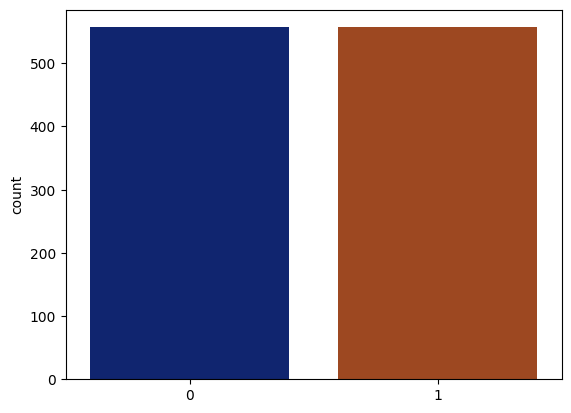

In [ ]:
#checking the new number of samples per class
ax = sns.countplot(x=y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

Training the model again 

In [ ]:
def run_exps(X_train , y_train, X_test, y_test) :
#def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
  dfs = []
models = [
          ('Logistic Regression', LogisticRegression()), 
          ('Random Forest', RandomForestClassifier()),
          ('KNearest Neighbors', KNeighborsClassifier()),
          ('SVM', SVC()), 
          ('Naive Bayes', GaussianNB()),
          ('XGBoost', XGBClassifier()),
          ('Decision Tree', DecisionTreeClassifier())
        ]
out = []
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['No risk of CHD', 'Risk of CHD']
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names), confusion_matrix(y_test,y_pred))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        out.append(this_df)
        final_nm = pd.concat(out, ignore_index=True)

Logistic Regression
                precision    recall  f1-score   support

No risk of CHD       0.52      0.53      0.53        79
   Risk of CHD       0.57      0.56      0.57        89

      accuracy                           0.55       168
     macro avg       0.55      0.55      0.55       168
  weighted avg       0.55      0.55      0.55       168
 [[42 37]
 [39 50]]
Random Forest
                precision    recall  f1-score   support

No risk of CHD       0.49      0.54      0.51        79
   Risk of CHD       0.55      0.49      0.52        89

      accuracy                           0.52       168
     macro avg       0.52      0.52      0.52       168
  weighted avg       0.52      0.52      0.52       168
 [[43 36]
 [45 44]]
KNearest Neighbors
                precision    recall  f1-score   support

No risk of CHD       0.50      0.54      0.52        79
   Risk of CHD       0.56      0.52      0.54        89

      accuracy                           0.53       168
     

In [ ]:
final_nm.head()

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.014428,0.009336,0.578947,0.581004,0.578947,0.578947,0.574981,Logistic Regression
1,0.007006,0.008001,0.497354,0.498112,0.497354,0.497608,0.526487,Logistic Regression
2,0.004341,0.005928,0.582011,0.598460,0.582011,0.581472,0.625964,Logistic Regression
3,0.004949,0.006244,0.592593,0.592943,0.592593,0.591953,0.616461,Logistic Regression
4,0.004508,0.005814,0.587302,0.604673,0.587302,0.589386,0.617431,Logistic Regression


In [ ]:
final_nm_gp = final_nm.groupby('model').mean().reset_index()
final_nm_gp.head(7)

,model,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc
0,Decision Tree,0.006168,0.011209,0.509502,0.515432,0.509502,0.510195,0.511453
1,KNearest Neighbors,0.002058,0.041462,0.588789,0.597842,0.588789,0.588753,0.618416
2,Logistic Regression,0.007047,0.007065,0.567641,0.575038,0.567641,0.567873,0.592265
3,Naive Bayes,0.001921,0.014106,0.553901,0.573593,0.553901,0.528757,0.593036
4,Random Forest,0.668006,0.106341,0.556007,0.559929,0.556007,0.556516,0.585826
5,SVM,0.122403,0.114529,0.583520,0.589643,0.583520,0.583742,0.618697
6,XGBoost,1.220982,0.047289,0.545486,0.551005,0.545486,0.546203,0.561812


In [ ]:
# Evaluating precision by model

fig16 = px.bar(final_nm_gp, x= 'test_precision_weighted', y = 'model', orientation='h', color='model', width=800, height=400,  color_discrete_sequence=['teal', 'olivedrab', 'grey', 'darksalmon', 'rosybrown', 'firebrick', 'darkgoldenrod'])
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig16.update_layout(barmode='stack', title={'text': 'Precision of Each Model trained - Near Miss Undersampling', 
                                           'x':0.5, 
                                           'xanchor': 'center'})
fig16.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), xaxis_tickformat = '%', xaxis_range=[0,1], showlegend=False)
fig16.show()

In [ ]:
# Evaluating Recall by model

fig17 = px.bar(final_nm_gp, x= 'test_recall_weighted', y = 'model', orientation='h', color='model', width=800, height=400,  color_discrete_sequence= px.colors.sequential.Plasma_r)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig17.update_layout(barmode='stack', title={'text': 'Recall of Each Model trained - Near Miss Undersampling', 
                                           'x':0.5, 
                                           'xanchor': 'center'})
fig17.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), xaxis_tickformat = '%', xaxis_range=[0,1], showlegend=False)
fig17.show()

The near miss undersampling method resulted in worst results than the original method, so we will try a new undersampling method for comparison. Precision and recall reduced when performing near miss undersampling method.

**Condensed Nearest Neighbor Rule Undersampling**

CNN is an attempt of avoiding losing potentially useful data. It starts with two blank datasets - A and B. Initially the first sample is placed in dataset A, while the rest samples are placed in dataset B. Then one instance from dataset B is scanned by using dataset A as the training set. If a point in B is misclassified, it is transferred from B to A. This process repeats until no points are transferred from B to A.

Counter({0: 9900, 1: 100})
Counter({0: 189, 1: 100})


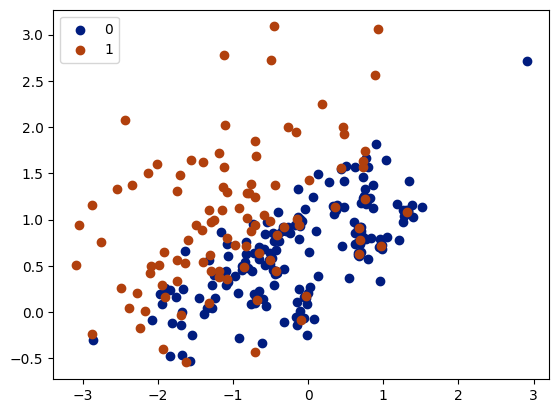

In [ ]:
# Undersample and plot imbalanced dataset with the Condensed Nearest Neighbor Rule
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import CondensedNearestNeighbour
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# define the undersampling method
undersample = CondensedNearestNeighbour(n_neighbors=1)
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [ ]:
def run_exps(X_train , y_train, X_test, y_test) :
#def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
  dfs = []
models = [
          ('Logistic Regression', LogisticRegression()), 
          ('Random Forest', RandomForestClassifier()),
          ('KNearest Neighbors', KNeighborsClassifier()),
          ('SVM', SVC()), 
          ('Naive Bayes', GaussianNB()),
          ('XGBoost', XGBClassifier()),
          ('Decision Tree', DecisionTreeClassifier())
        ]
out = []
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['No risk of CHD', 'Risk of CHD']
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names), confusion_matrix(y_test,y_pred))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        out.append(this_df)
        final_cnn = pd.concat(out, ignore_index=True)

Logistic Regression
                precision    recall  f1-score   support

No risk of CHD       0.79      0.96      0.87        28
   Risk of CHD       0.90      0.56      0.69        16

      accuracy                           0.82        44
     macro avg       0.85      0.76      0.78        44
  weighted avg       0.83      0.82      0.81        44
 [[27  1]
 [ 7  9]]
Random Forest
                precision    recall  f1-score   support

No risk of CHD       0.76      0.79      0.77        28
   Risk of CHD       0.60      0.56      0.58        16

      accuracy                           0.70        44
     macro avg       0.68      0.67      0.68        44
  weighted avg       0.70      0.70      0.70        44
 [[22  6]
 [ 7  9]]
KNearest Neighbors
                precision    recall  f1-score   support

No risk of CHD       0.79      0.96      0.87        28
   Risk of CHD       0.90      0.56      0.69        16

      accuracy                           0.82        44
     

In [ ]:
final_cnn.head()

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.006121,0.010852,0.795918,0.808403,0.795918,0.788786,0.838435,Logistic Regression
1,0.002781,0.006130,0.857143,0.866300,0.857143,0.850953,0.840502,Logistic Regression
2,0.003088,0.005702,0.734694,0.712925,0.734694,0.720912,0.711712,Logistic Regression
3,0.002841,0.006152,0.775510,0.794278,0.775510,0.767155,0.843434,Logistic Regression
4,0.002507,0.005440,0.938776,0.951895,0.938776,0.941191,0.990431,Logistic Regression


In [ ]:
final_cnn_gp = final_cnn.groupby('model').mean().reset_index()
final_cnn_gp.head(7)

,model,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc
0,Decision Tree,0.001044,0.005373,0.673469,0.683287,0.673469,0.672429,0.632032
1,KNearest Neighbors,0.000806,0.008447,0.808163,0.811354,0.808163,0.791436,0.735596
2,Logistic Regression,0.003467,0.006855,0.820408,0.826760,0.820408,0.813799,0.844903
3,Naive Bayes,0.001074,0.006774,0.751020,0.758811,0.751020,0.737115,0.811614
4,Random Forest,0.170441,0.027462,0.751020,0.756538,0.751020,0.740705,0.694330
5,SVM,0.002699,0.007742,0.808163,0.813011,0.808163,0.796687,0.841060
6,XGBoost,0.034839,0.009393,0.730612,0.740766,0.730612,0.725198,0.701181


In [ ]:
# Evaluating precision by model

fig18 = px.bar(final_cnn_gp, x= 'test_precision_weighted', y = 'model', orientation='h', color='model', width=700, height=400,  color_discrete_sequence=['teal', 'olivedrab', 'grey', 'darksalmon', 'rosybrown', 'firebrick', 'darkgoldenrod'])
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig18.update_layout(barmode='stack', title={'text': 'Precision of Each Model trained - CNN Undersampling', 
                                           'x':0.5, 
                                           'xanchor': 'center'})
fig18.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), xaxis_tickformat = '%', xaxis_range=[0,1], showlegend=False)
fig18.show()

In [ ]:
fig19 = px.bar(final_cnn_gp, x= 'test_recall_weighted', y = 'model', orientation='h', color='model', width=700, height=400, color_discrete_sequence= px.colors.sequential.Plasma_r)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig19.update_layout(barmode='stack', title={'text': 'Recall of Each Model trained - CNN Undersampling', 
                                           'x':0.5, 
                                           'xanchor': 'center'})
fig19.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), xaxis_tickformat = '%', xaxis_range=[0,1], showlegend=False)
fig19.show()

The condensed near neighbors undersampling method improved the results somehow.

**Logistic Regression**

Improved precision of Risk category (78% - before it was 64%) but lowered precision for the No risk category (74%, before it was 84%). Recall for the Risk category improved to 44% (before it was 10%) but it still is too low, which indicates the presence of too many false negatives.

**SVM**

Lowered precision of No risk category (74% over 83% in the first attempt) and Risk (78% - before it was 38%). Recall, like in logistic regression, improved for the Risk category (44% over 3% before) and decayed for the No risk category (93% - before it was 99%). The recall was not good, too low for the Risk category, indicating the presence of too many false negatives.

**KNN**

Presented good precision overall compared to the other methods: 75% for no risk (before it was 50%) and 88% for the risk category (before it was 64%) but also had a bad recall, indicating too many false negatives.

Next an oversampling method will be tested to check whether we can improve the pair precision and recall

**Resampling with SMOTE (Oversampling)**

In imbalanced datasets the minitory class has much less examples for a model the effectively learn the decision boundary. Oversampling the examples of the minority class is one way of solving this.

SMOTE stands for Synthetic Minority Oversampling Technique. SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Counter({0: 9900, 1: 100})


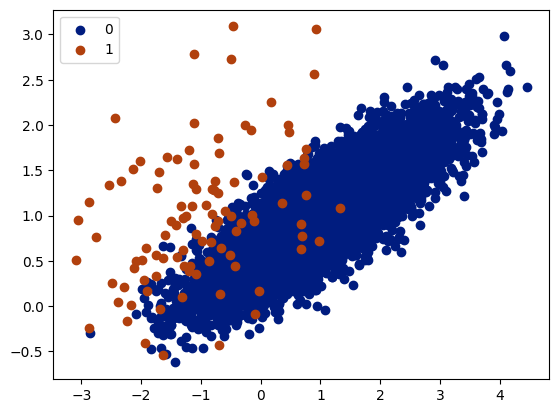

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [ ]:
def run_exps(X_train , y_train, X_test, y_test) :
#def run_exps(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
  dfs = []
models = [
          ('Logistic Regression', LogisticRegression()), 
          ('Random Forest', RandomForestClassifier()),
          ('KNearest Neighbors', KNeighborsClassifier()),
          ('SVM', SVC()), 
          ('Naive Bayes', GaussianNB()),
          ('XGBoost', XGBClassifier()),
          ('Decision Tree', DecisionTreeClassifier())
        ]
out = []
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['No risk of CHD', 'Risk of CHD']
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names), confusion_matrix(y_test,y_pred))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        out.append(this_df)
        final_smt = pd.concat(out, ignore_index=True)

Logistic Regression
                precision    recall  f1-score   support

No risk of CHD       0.99      1.00      1.00      1484
   Risk of CHD       1.00      0.44      0.61        16

      accuracy                           0.99      1500
     macro avg       1.00      0.72      0.80      1500
  weighted avg       0.99      0.99      0.99      1500
 [[1484    0]
 [   9    7]]
Random Forest
                precision    recall  f1-score   support

No risk of CHD       1.00      1.00      1.00      1484
   Risk of CHD       0.71      0.75      0.73        16

      accuracy                           0.99      1500
     macro avg       0.85      0.87      0.86      1500
  weighted avg       0.99      0.99      0.99      1500
 [[1479    5]
 [   4   12]]
KNearest Neighbors
                precision    recall  f1-score   support

No risk of CHD       0.99      1.00      1.00      1484
   Risk of CHD       0.89      0.50      0.64        16

      accuracy                           0.99

In [ ]:
final_smt.head()

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.032164,0.011712,0.994706,0.994314,0.994706,0.994025,0.926392,Logistic Regression
1,0.020618,0.011554,0.993529,0.993120,0.993529,0.992656,0.994044,Logistic Regression
2,0.013740,0.010599,0.994706,0.994734,0.994706,0.993459,0.987926,Logistic Regression
3,0.011467,0.010613,0.994118,0.993252,0.994118,0.993321,0.876546,Logistic Regression
4,0.013420,0.010458,0.994118,0.994152,0.994118,0.992995,0.941868,Logistic Regression


In [ ]:
final_smt_gp = final_smt.groupby('model').mean().reset_index()
final_smt_gp.head(7)

,model,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc
0,Decision Tree,0.020115,0.008255,0.990353,0.990466,0.990353,0.990372,0.755535
1,KNearest Neighbors,0.003645,0.058715,0.994353,0.994025,0.994353,0.993442,0.822613
2,Logistic Regression,0.018282,0.010987,0.994235,0.993914,0.994235,0.993291,0.945355
3,Naive Bayes,0.002409,0.007675,0.987647,0.985813,0.987647,0.986542,0.925719
4,Random Forest,1.313274,0.091683,0.994118,0.993612,0.994118,0.993321,0.879909
5,SVM,0.049533,0.029436,0.994471,0.994247,0.994471,0.993530,0.779753
6,XGBoost,0.304879,0.017523,0.994353,0.993748,0.994353,0.993748,0.931670


In [ ]:
fig20 = px.bar(final_smt_gp, x= 'test_precision_weighted', y = 'model', orientation='h', color='model', width=700, height=400,  color_discrete_sequence=['teal', 'olivedrab', 'grey', 'darksalmon', 'rosybrown', 'firebrick', 'darkgoldenrod'],)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig20.update_layout(barmode='stack', title={'text': 'Precision of Each Model trained - SMOTE Oversampling', 
                                           'x':0.5, 
                                           'xanchor': 'center'})
fig20.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), xaxis_tickformat = '%', xaxis_range=[0,1], showlegend=False)
fig20.show()

In [ ]:
fig21 = px.bar(final_smt_gp, x= 'test_recall_weighted', y = 'model', orientation='h', color='model', width=700, height=400, color_discrete_sequence= px.colors.sequential.Plasma_r)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig21.update_layout(barmode='stack', title={'text': 'Recall of Each Model trained - SMOTE Oversampling', 
                                           'x':0.5, 
                                           'xanchor': 'center'})
fig21.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), xaxis_tickformat = '%', xaxis_range=[0,1], showlegend=False)
fig21.show()

This time both the results for precision and recall were good for different algorithms. Random Forest gave the best pair of results for precision and recall:

Precision: 100% for No risk and 72% for Risk categories. Recall: 100% for No risk and 81% for Risk categories.


**Checking if the oversampled model is overfit**

Refrence code : https://machinelearningmastery.com/overfitting-machine-learning-models/](https://machinelearningmastery.com/overfitting-machine-learning-models/

>1, train: 0.828, test: 0.815
>2, train: 0.869, test: 0.855
>3, train: 0.889, test: 0.883
>4, train: 0.912, test: 0.907
>5, train: 0.925, test: 0.913
>6, train: 0.936, test: 0.927
>7, train: 0.948, test: 0.934
>8, train: 0.957, test: 0.933
>9, train: 0.965, test: 0.937
>10, train: 0.970, test: 0.939
>11, train: 0.977, test: 0.937
>12, train: 0.983, test: 0.941
>13, train: 0.988, test: 0.945
>14, train: 0.993, test: 0.943
>15, train: 0.996, test: 0.943
>16, train: 0.998, test: 0.945
>17, train: 0.998, test: 0.946
>18, train: 1.000, test: 0.948
>19, train: 1.000, test: 0.943
>20, train: 1.000, test: 0.949


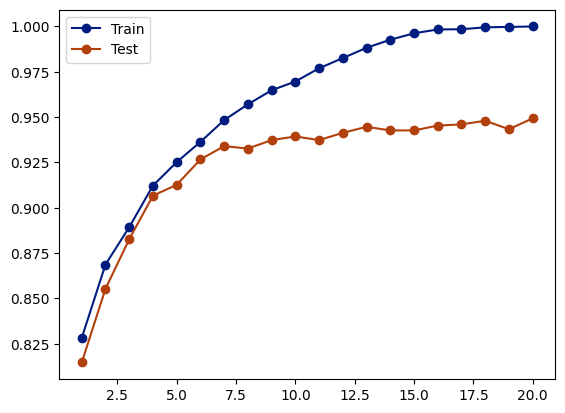

In [ ]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.metrics import accuracy_score

# create dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [ ]:
train = pd.DataFrame(train_scores,columns=['train'])
test = pd.DataFrame(test_scores, columns=['test'])

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [ ]:
fig22 = go.Figure()
fig22.add_trace(go.Scatter(x=x, y=train['train'],
                    mode='lines+markers',
                    name='train'))
fig22.add_trace(go.Scatter(x=x, y=test['test'],
                    mode='lines+markers',
                    name='test'))
fig22.update_layout(
    title={
        'text': "Checking if the model is overfit",
        'x':0.5,
        'xanchor': 'center'},
    width=800,
    height=400)
fig22.show()


In the plot above we can see that on depth number 10, the test data momentarily decreased accuracy while training data continued to increase accuracy. This scenario changed on the following depth. Still, there is an indication that the model is overfit because of this different behavior on the depth 10. The shape of the curves also gives an indication that the data might be overfit.

**Resampling with SMOTE-ENN (Undersampling and Oversampling Simultaniously)**

implemention of an undersampling and oversampling method simultaneously and checking if the model is overfit / underfit.

Counter({0: 9900, 1: 100})
Counter({1: 8936, 0: 8656})


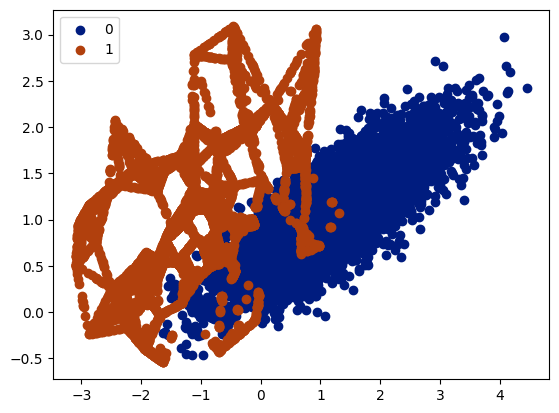

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
from imblearn.combine import SMOTEENN

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# summarize class distribution
counter = Counter(y)
print(counter)

# transform the dataset using SMOTE-ENN
smote_enn = SMOTEENN(random_state=1)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

# summarize class distribution after SMOTE-ENN
counter = Counter(y_resampled)
print(counter)

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y_resampled == label)[0]
	pyplot.scatter(X_resampled[row_ix, 0], X_resampled[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [ ]:
from imblearn.combine import SMOTEENN
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import pandas as pd
from sklearn import model_selection

def run_exps(X, y):
    smote_enn = SMOTEENN(random_state=0)
    X_resampled, y_resampled = smote_enn.fit_resample(X, y)
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.15, random_state=0)

dfs = []
models = [
          ('Logistic Regression', LogisticRegression()), 
          ('Random Forest', RandomForestClassifier()),
          ('KNearest Neighbors', KNeighborsClassifier()),
          ('SVM', SVC()), 
          ('Naive Bayes', GaussianNB()),
          ('XGBoost', XGBClassifier()),
          ('Decision Tree', DecisionTreeClassifier())
        ]
out = []
results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['No risk of CHD', 'Risk of CHD']
for name, model in models:
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names), confusion_matrix(y_test,y_pred))
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        out.append(this_df)
        final_smt_enn = pd.concat(out, ignore_index=True)
#     return final_smt_enn

# # Example usage
# X = pd.DataFrame(train_scores,columns=['train'])
# y = pd.DataFrame(test_scores, columns=['test'])
# final_smt_enn = run_exps(X, y)
# print(final_smt_enn)


Logistic Regression
                precision    recall  f1-score   support

No risk of CHD       0.93      0.78      0.85       764
   Risk of CHD       0.81      0.94      0.87       736

      accuracy                           0.86      1500
     macro avg       0.87      0.86      0.86      1500
  weighted avg       0.87      0.86      0.86      1500
 [[599 165]
 [ 43 693]]
Random Forest
                precision    recall  f1-score   support

No risk of CHD       0.96      0.93      0.94       764
   Risk of CHD       0.93      0.96      0.94       736

      accuracy                           0.94      1500
     macro avg       0.95      0.95      0.94      1500
  weighted avg       0.95      0.94      0.94      1500
 [[708  56]
 [ 27 709]]
KNearest Neighbors
                precision    recall  f1-score   support

No risk of CHD       0.96      0.92      0.94       764
   Risk of CHD       0.92      0.96      0.94       736

      accuracy                           0.94      15

In [ ]:
final_smt_enn.head()

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.023849,0.012104,0.864118,0.871086,0.864118,0.863591,0.897465,Logistic Regression
1,0.017442,0.011830,0.872941,0.880469,0.872941,0.872273,0.895867,Logistic Regression
2,0.018570,0.011833,0.852353,0.862564,0.852353,0.851271,0.879350,Logistic Regression
3,0.017834,0.013857,0.853529,0.862087,0.853529,0.852448,0.875841,Logistic Regression
4,0.020694,0.011939,0.867059,0.876087,0.867059,0.866228,0.881603,Logistic Regression


In [ ]:
final_smt_enn_gp = final_smt_enn.groupby('model').mean().reset_index()
final_smt_enn_gp.head(7)

,model,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc
0,Decision Tree,0.202604,0.008771,0.913882,0.913920,0.913882,0.913877,0.913845
1,KNearest Neighbors,0.002039,0.256695,0.935412,0.935774,0.935412,0.935397,0.971645
2,Logistic Regression,0.019678,0.012313,0.862000,0.870458,0.862000,0.861162,0.886025
3,Naive Bayes,0.004253,0.011754,0.832824,0.838281,0.832824,0.832114,0.900136
4,Random Forest,2.750300,0.083037,0.943176,0.943337,0.943176,0.943170,0.985397
5,SVM,0.622640,0.327869,0.933412,0.934367,0.933412,0.933371,0.979672
6,XGBoost,3.404337,0.019987,0.944235,0.944348,0.944235,0.944231,0.985016


In [ ]:
fig23 = px.bar(final_smt_enn_gp, x= 'test_precision_weighted', y = 'model', orientation='h', color='model', width=700, height=400,  color_discrete_sequence=['teal', 'olivedrab', 'grey', 'darksalmon', 'rosybrown', 'firebrick', 'darkgoldenrod'],)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig23.update_layout(barmode='stack', title={'text': 'Precision of Each Model trained - SMOTE-ENN', 
                                           'x':0.5, 
                                           'xanchor': 'center'})
fig23.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), xaxis_tickformat = '%', xaxis_range=[0,1], showlegend=False)
fig23.show()

In [ ]:
fig24 = px.bar(final_smt_enn_gp, x= 'test_recall_weighted', y = 'model', orientation='h', color='model', width=700, height=400, color_discrete_sequence= px.colors.sequential.Plasma_r)
#.for_each_trace(lambda t: t.update(name=t.name.split("=")[1]))
fig24.update_layout(barmode='stack', title={'text': 'Recall of Each Model trained - SMOTE-ENN', 
                                           'x':0.5, 
                                           'xanchor': 'center'})
fig24.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=13,
        font_family="Rockwell"
    ), xaxis_tickformat = '%', xaxis_range=[0,1], showlegend=False)
fig24.show()

>1, train: 0.846, test: 0.831
>2, train: 0.864, test: 0.857
>3, train: 0.898, test: 0.893
>4, train: 0.915, test: 0.895
>5, train: 0.923, test: 0.913
>6, train: 0.932, test: 0.922
>7, train: 0.943, test: 0.930
>8, train: 0.954, test: 0.938
>9, train: 0.964, test: 0.942
>10, train: 0.970, test: 0.943
>11, train: 0.977, test: 0.943
>12, train: 0.985, test: 0.949
>13, train: 0.989, test: 0.951
>14, train: 0.993, test: 0.949
>15, train: 0.996, test: 0.949
>16, train: 0.998, test: 0.953
>17, train: 0.999, test: 0.949
>18, train: 1.000, test: 0.951
>19, train: 1.000, test: 0.953
>20, train: 1.000, test: 0.954


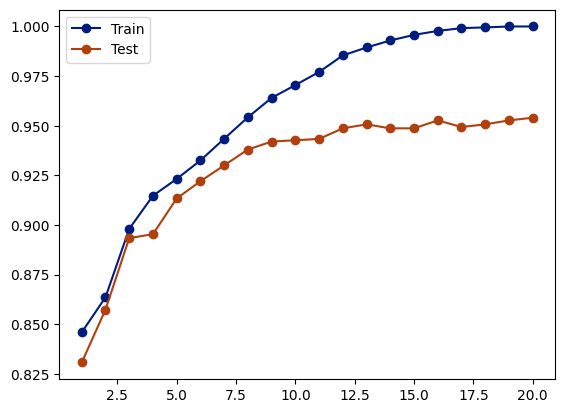

In [ ]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.metrics import accuracy_score

# create dataset
X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = RandomForestClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [ ]:
train = pd.DataFrame(train_scores,columns=['train'])
test = pd.DataFrame(test_scores, columns=['test'])

In [ ]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [ ]:
fig25 = go.Figure()
fig25.add_trace(go.Scatter(x=x, y=train['train'],
                    mode='lines+markers',
                    name='train'))
fig25.add_trace(go.Scatter(x=x, y=test['test'],
                    mode='lines+markers',
                    name='test'))
fig25.update_layout(
    title={
        'text': "Checking if the model is overfit",
        'x':0.5,
        'xanchor': 'center'},
    width=800,
    height=400)
fig25.show()
